# ÖDEV-5

### Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

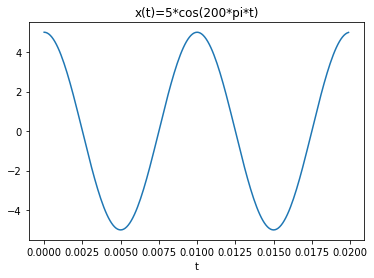

In [2]:
import matplotlib.pyplot as plt
import numpy as np
F=100 #x sinyalinin temel frekansı
T=1/F
t=np.arange(0.,2*T,0.0001)
x=5*np.cos(200*np.pi*t)
plt.xlabel("t")
plt.title("x(t)=5*cos(200*pi*t)")
plt.plot(t,x)
plt.show()

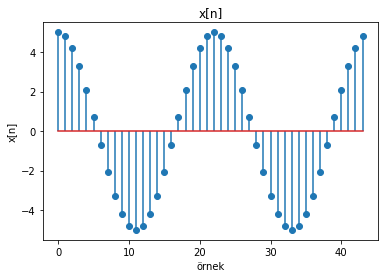

In [3]:
Fs=2200 #sampling freq.
Ts=1/Fs
N=22 # örnek sayısı
n=np.arange(0.,2*N) #örnekleme indisi 0'dan iki periyot olacak şekilde tanım.
xn=5*np.cos(200*np.pi*n*Ts)
plt.stem(n,xn)
plt.title("x[n]")
plt.xlabel("örnek")
plt.ylabel("x[n]")
plt.show()

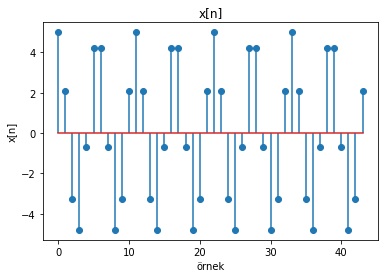

In [4]:
Fs=550 #sampling freq.
Ts=1/Fs
N=22 # örnek sayısı
n=np.arange(0.,2*N) #örnekleme indisi 0'dan iki periyot olacak şekilde tanım.
xn=5*np.cos(200*np.pi*n*Ts)
plt.stem(n,xn)
plt.title("x[n]")
plt.xlabel("örnek")
plt.ylabel("x[n]")
plt.show()

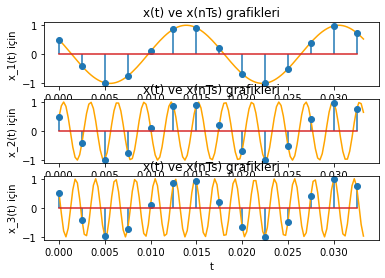

In [9]:
t=np.arange(0.,2/60,1/4000)
xt_1=np.cos(2*np.pi*60*t+np.pi/3)
xt_2=np.cos(2*np.pi*340*t-np.pi/3)
xt_3=np.cos(2*np.pi*460*t+np.pi/3)

Fs=400
Ts=1/Fs

nTs=np.arange(0.,2/60,Ts)
xnTs_1=np.cos(2*np.pi*60*nTs+np.pi/3)
xnTs_2=np.cos(2*np.pi*340*nTs-np.pi/3)
xnTs_3=np.cos(2*np.pi*460*nTs+np.pi/3)

#x1(t) için
plt.subplot(3,1,1)
plt.xlabel("t")
plt.ylabel("x_1(t) için")
plt.title("x(t) ve x(nTs) grafikleri")
plt.plot(t,xt_1,color='orange')
plt.stem(nTs,xnTs_1)

#x2(t) için
plt.subplot(3,1,2)
plt.xlabel("t")
plt.ylabel("x_2(t) için")
plt.title("x(t) ve x(nTs) grafikleri")
plt.plot(t,xt_2,color='orange')
plt.stem(nTs,xnTs_2)

#x3(t) için
plt.subplot(3,1,3)
plt.xlabel("t")
plt.ylabel("x_3(t) için")
plt.title("x(t) ve x(nTs) grafikleri")
plt.plot(t,xt_3,color='orange')
plt.stem(nTs,xnTs_3)
plt.show()

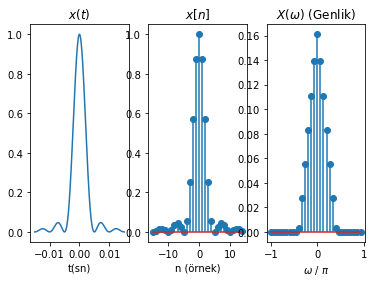

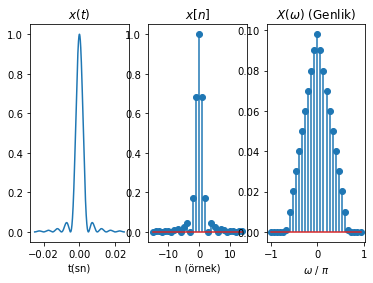

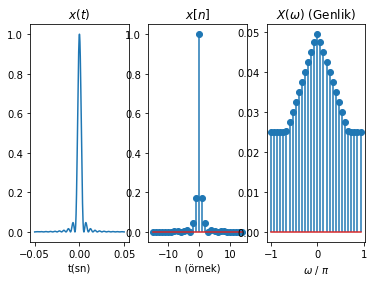

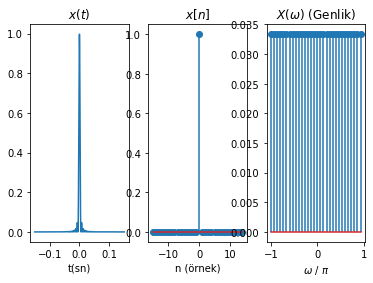

In [17]:
import scipy.fftpack

def signall(Fs,N,k):
    
    F=100
    T=1/F
    t=np.linspace(-k*T/2,k*T/2,1000)
    xt=np.sinc(2*F*t)**2
    
    Ts=1/Fs
    n=np.arange(-N/2,N/2)
    xn=np.sinc(2*F*n*Ts)**2
    
    w=np.arange(-np.pi,np.pi,2*np.pi/N)
    xw=np.fft.fftshift(np.fft.fft(xn,N)/N)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.plot(t,xt)
    plt.xlabel("t(sn)")
    plt.title("$x(t)$")
    
    plt.subplot(1,3,2)
    plt.stem(n,xn)
    plt.xlabel("n (örnek)")
    plt.title("$x[n]$")
    
    plt.subplot(1,3,3)
    plt.stem(w/np.pi,abs(xw))
    plt.xlabel("$\omega$ / $\pi$")
    plt.title("$X(\omega)$ (Genlik)")
    plt.show()

signall(1000,30,3)
signall(600,30,5)
signall(300,30,10)
signall(100,30,30)

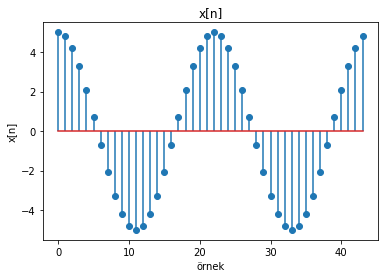

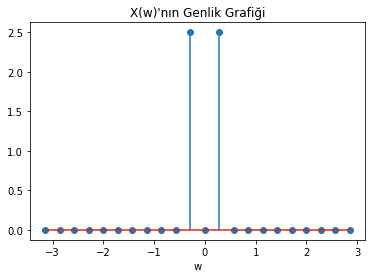

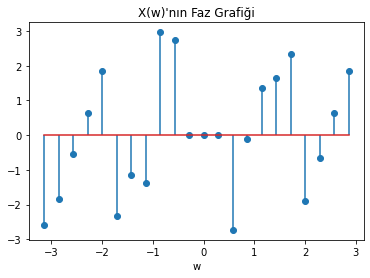

In [18]:
Fs=2200
Ts=1/Fs
N=22
n=np.arange(0.,2*N)
xn=5*np.cos(200*np.pi*n*Ts)

plt.stem(n,xn)
plt.title("x[n]")
plt.xlabel("örnek")
plt.ylabel("x[n]")
plt.show()

w=np.linspace(-np.pi,np.pi-(2*np.pi/N),N)
x_w=np.fft.fft(xn,N)/N # fourier transform
x_w=np.fft.fftshift(x_w) #x(w) işaretini -pi,+pi aralığında gösterir.

plt.figure()
plt.stem(w,np.abs(x_w))
plt.title("X(w)'nın Genlik Grafiği")
plt.xlabel("w")
plt.show()
plt.figure()
plt.stem(w,np.angle(x_w))
plt.title("X(w)'nın Faz Grafiği")
plt.xlabel("w")
plt.show()

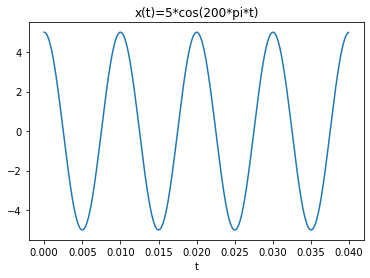

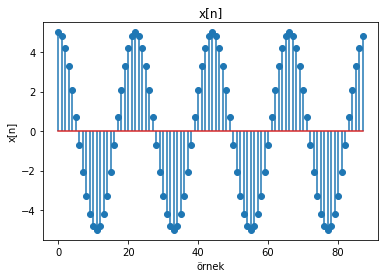

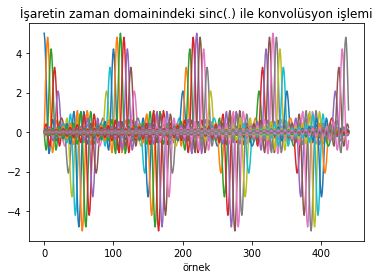

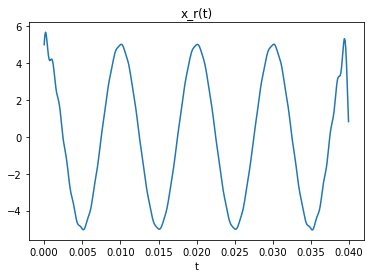

In [19]:
F=100
T=1/F

k=4 #Bu örnek için işaret 4periyot boyunca çizdirilecek
t=np.arange(0.,k*T,0.002/22)
x=5*np.cos(200*np.pi*t)

plt.figure()
plt.xlabel("t")
plt.title("x(t)=5*cos(200*pi*t)")
plt.plot(t,x)
plt.show()

Fs=2200
Ts=1/Fs
N=22
n=np.arange(0,k*N)
xn=5*np.cos(200*np.pi*n*Ts)

plt.figure()
plt.stem(n,xn)
plt.title("x[n]")
plt.xlabel("örnek")
plt.ylabel("x[n]")
plt.show()

#Reconstruction
x_sinc = np.zeros([k*N,np.size(x,axis=0)])
plt.figure()
for ni in n:
    x_sinc[ni,:]=xn[ni]*np.sinc((t-(ni)*Ts)/Ts)
    plt.plot(x_sinc[ni,:])
plt.title("İşaretin zaman domainindeki sinc(.) ile konvolüsyon işlemi")
plt.xlabel("örnek")
plt.show()

xr_t = np.sum(x_sinc,axis=0)
plt.figure()
plt.xlabel("t")
plt.title("x_r(t)")
plt.plot(t,xr_t)
plt.show()

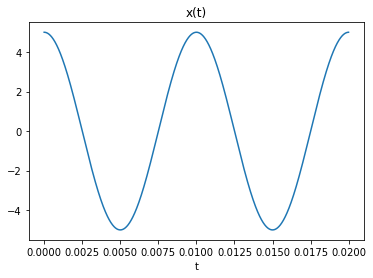

<Figure size 432x288 with 0 Axes>

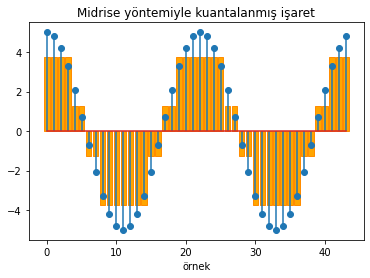

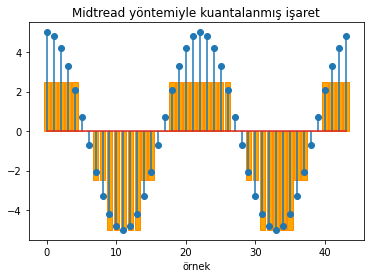

In [23]:
F=100
T=1/F
k=2
t=np.arange(0.,k*T,0.00001)
x=5*np.cos(200*np.pi*t)

plt.figure()
plt.xlabel("t")
plt.title("x(t)")
plt.plot(t,x)
plt.show()

Fs=2200
Ts=1/Fs
N=22
n=np.arange(0.,k*N)
xn=5*np.cos(200*np.pi*n*Ts)

#Kuantalama
def quantize(x,S):
    X = x.reshape((-1,1))
    S = S.reshape((1,-1))
    dists = abs(X-S)
    
    nearestIndex = dists.argmin(axis=1)
    quantized = S.flat[nearestIndex]
    
    return quantized.reshape(x.shape)

k_bit = 2
Max_range = np.amax(xn)-np.amin(xn)
q = pow(2,k_bit)
delta = Max_range/q

S_midrise = -np.amax(xn) + delta/2 + np.arange(q)*delta
S_midtread = -np.amax(xn) + np.arange(q)*delta

y_midtrise = quantize(xn, S_midrise)
y_midtread = quantize(xn, S_midtread)

plt.figure()
fig, ax = plt.subplots()
ax.stem(n,xn)
ax.bar(n,y_midtrise,color='orange',edgecolor="darkorange")
plt.xlabel("örnek")
plt.title('Midrise yöntemiyle kuantalanmış işaret')

fig,ax = plt.subplots()
ax.stem(n,xn)
ax.bar(n,y_midtread,color='orange',edgecolor="darkorange")
plt.xlabel("örnek")
plt.title('Midtread yöntemiyle kuantalanmış işaret')
plt.show()

### Ön hazırlık ödevleri (ÖDEV-5 başlığı altındaki soruların çözümleri aşağıda verilecek)

### SORU-1

### a)

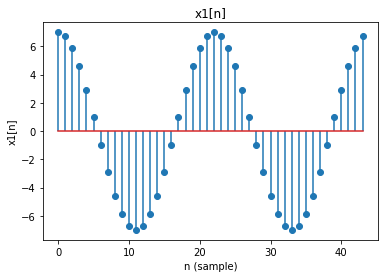

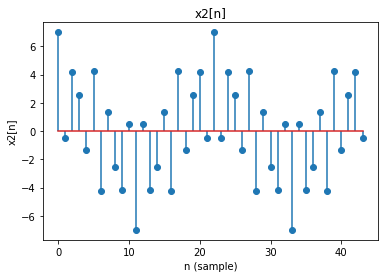

In [53]:
import matplotlib.pyplot as plt
import numpy as np

Fs = 2200  #sampling freq.
Ts = 1/Fs  #sampling period
N  = 22    #örnek sayısı

n   = np.arange(0.,2*N)
x1n = 7*np.cos(200*np.pi*n*Ts)
x2n = 3*np.cos(200*np.pi*n*Ts) + 4*np.cos(1800*np.pi*n*Ts)

plt.figure()
plt.stem(n,x1n)
plt.title('x1[n]')
plt.xlabel('n (sample)')
plt.ylabel('x1[n]')
plt.show()

plt.figure()
plt.stem(n,x2n)
plt.title('x2[n]')
plt.xlabel('n (sample)')
plt.ylabel('x2[n]')
plt.show()

#t =  np.arange(0.,5/900,0.00001)
#x2 = 3*np.cos(200*np.pi*t) + 4*np.cos(1800*np.pi*t)
#plt.plot(t,x2)

Nyquist rate iki işaret için de düzgün örnekleme için yeterli olduğu için iki işaret de örtüşme olmadan örneklendi ve iki periyot için grafikleri çizdirildi.

### b)

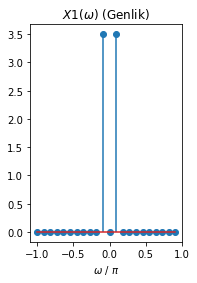

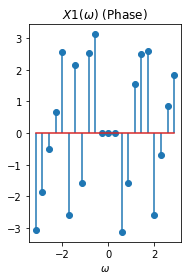

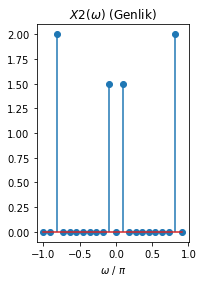

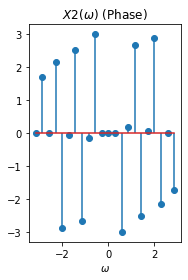

In [69]:
#Fourier transform
w = np.arange(-np.pi,np.pi,2*np.pi/N)
x1w = np.fft.fftshift(np.fft.fft(x1n,N)/N)

plt.figure()
plt.subplot(1,2,1)
plt.plot()
plt.stem(w/np.pi,abs(x1w))
plt.xlabel("$\omega$ / $\pi$")
plt.title("$X1(\omega)$ (Genlik)")
plt.show()

plt.figure()
plt.subplot(1,2,2)
plt.plot()
plt.stem(w,np.angle(x1w))
plt.xlabel("$\omega$")
plt.title("$X1(\omega)$ (Phase)")
plt.show()

x2w = np.fft.fftshift(np.fft.fft(x2n,N)/N)
plt.figure()
plt.subplot(1,2,1)
plt.plot()
plt.stem(w/np.pi,abs(x2w))
plt.xlabel("$\omega$ / $\pi$")
plt.title("$X2(\omega)$ (Genlik)")
plt.show()

plt.figure()
plt.subplot(1,2,2)
plt.plot()
plt.stem(w,np.angle(x2w))
plt.xlabel("$\omega$")
plt.title("$X2(\omega)$ (Phase)")
plt.show()

### c)

Elde edilen X1(w) ve X2(w) grafikleri beklendiği gibidir. İşaretlerde herhangi bir örtüşme oluşmamıştır. Örtüşme olmadığı için reconstruction işlemi ile ayrık işaretler alçak geçiren filtreden geçirilerek tekrar doğru bir şekilde elde edilebilir.

### SORU-2

### a)

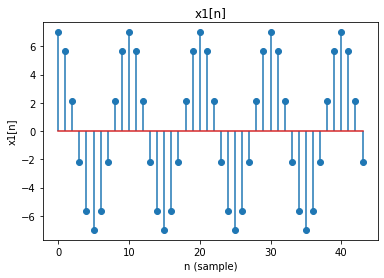

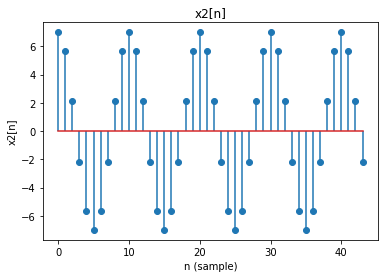

In [70]:
import matplotlib.pyplot as plt
import numpy as np

Fs = 1000  #sampling freq.
Ts = 1/Fs  #sampling period
N  = 22    #örnek sayısı

n   = np.arange(0.,2*N)
x1n = 7*np.cos(200*np.pi*n*Ts)
x2n = 3*np.cos(200*np.pi*n*Ts) + 4*np.cos(1800*np.pi*n*Ts)

plt.figure()
plt.stem(n,x1n)
plt.title('x1[n]')
plt.xlabel('n (sample)')
plt.ylabel('x1[n]')
plt.show()

plt.figure()
plt.stem(n,x2n)
plt.title('x2[n]')
plt.xlabel('n (sample)')
plt.ylabel('x2[n]')
plt.show()

#t =  np.arange(0.,5/900,0.00001)
#x2 = 3*np.cos(200*np.pi*t) + 4*np.cos(1800*np.pi*t)
#plt.plot(t,x2)

İki işaret de aynı çıktı. Bunun sebebi örnekleme frekansımızın nyquist rate için yeterli olmamasıdır. x1(t) sinyalini örneklemek için örnekleme frekansı yeterli olsa da x2(t) sinyali için yetersizdir. Bu sebeble örtüşme gerçekleşmiştir. 

Örnekleme yapıldığı zaman:

$ x1[n]=7*cos(0.2*\pi*n)$

$ x2[n]=3*cos(0.2*\pi*n)+ 4*cos(1.8*\pi*n)$

olarak elde ediliyor. Birbirini 2pi'ye tamamlayan sinüsoidal işaretler aynı işaretlere karşılık geldiği için iki grafik de tamamen aynı olarak elde edilmiştir. Yukarıdaki örneklenmiş sinyaller tamamen aynı değerlere sahip olacaktır.

### b)

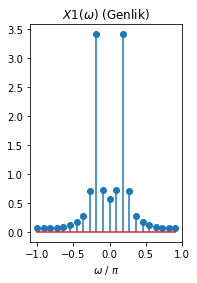

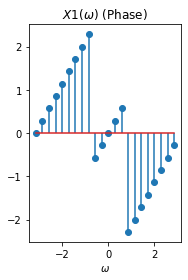

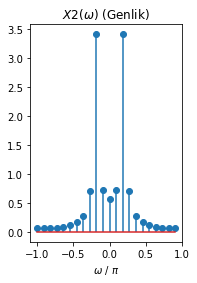

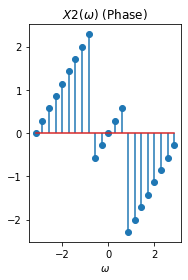

In [71]:
#Fourier transform
w = np.arange(-np.pi,np.pi,2*np.pi/N)
x1w = np.fft.fftshift(np.fft.fft(x1n,N)/N)

plt.figure()
plt.subplot(1,2,1)
plt.plot()
plt.stem(w/np.pi,abs(x1w))
plt.xlabel("$\omega$ / $\pi$")
plt.title("$X1(\omega)$ (Genlik)")
plt.show()

plt.figure()
plt.subplot(1,2,2)
plt.plot()
plt.stem(w,np.angle(x1w))
plt.xlabel("$\omega$")
plt.title("$X1(\omega)$ (Phase)")
plt.show()

x2w = np.fft.fftshift(np.fft.fft(x2n,N)/N)
plt.figure()
plt.subplot(1,2,1)
plt.plot()
plt.stem(w/np.pi,abs(x2w))
plt.xlabel("$\omega$ / $\pi$")
plt.title("$X2(\omega)$ (Genlik)")
plt.show()

plt.figure()
plt.subplot(1,2,2)
plt.plot()
plt.stem(w,np.angle(x2w))
plt.xlabel("$\omega$")
plt.title("$X2(\omega)$ (Phase)")
plt.show()

İlk kısımda gösterildiği gibi örneklenen işaretler birbirinin aynısıdır. Bu durumda frekans domainindeki ifadeleri de aynı olarak elde edilmiştir.

### c)

Elde ettiğimiz X1(w) ve X2(w) grafiklerine bakarak x1[n] ve x2[n] sinyallerini tahmin etmemiz mümkün değildir. Örtüşme gerçekleştiği için frekans domainindeki ifadeler birebir aynıdır. Nyquist rate iki sinyalin de örtüşme olmayacak şekilde seçilmemesinden dolayı bu sonuç elde edilmiştir.